In [1]:
import os
os.getcwd()
os.chdir("C:\\Q")
import pandas as pd

train = pd.read_csv('facebook_train.csv')
test = pd.read_csv('facebook_test.csv')


In [2]:
train.head(10)

,ID,Status,No Friend,education,about me,family,gender,relationship,phototag*,photopost*,...,music,film,series,book,game,restaurant,like,group,note,post shared/post posted rate
0,101,real,170,university,yes,yes,male,complicate,29,59,...,1,3,6,0,6,2,101,2,yes,0.1
1,102,real,353,university,yes,yes,male,alone,1,13,...,11,6,10,1,1,6,550,19,no,0.1
2,103,real,517,university,no,yes,male,alone,112,236,...,0,8,3,1,5,17,318,23,yes,0.5
3,104,real,460,university,no,yes,male,alone,74,142,...,16,14,17,6,19,0,900,32,yes,0.3
4,105,real,240,university,no,yes,female,complicate,23,13,...,0,0,0,0,0,0,15,2,no,0.1
5,106,real,340,high school,no,yes,male,complicate,12,120,...,0,0,0,0,0,0,44,3,no,0.5
6,107,real,460,no,no,yes,male,married,6,13,...,2,11,4,0,0,0,42,2,no,0.2
7,108,real,534,university,no,yes,male,,7,35,...,5,2,1,1,0,0,140,4,no,0.0
8,109,real,957,university,no,yes,male,alone,32,10,...,10,8,6,1,10,0,130,122,yes,0.1
9,110,real,452,university,no,yes,male,alone,4,27,...,16,13,5,4,5,0,454,36,yes,0.0


## 변수 선정

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from pandas import DataFrame

In [4]:
def bar_chart(feature):
    real = train[train['Status']=='real'][feature].value_counts()
    fake = train[train['Status']=='fake'][feature].value_counts()
    df= pd.DataFrame([real,fake])
    df.index=['Real','Fake']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

In [5]:
train_test_data = [train,test]

gender_maping = {"male":0,"female":1}
for dataset in train_test_data:
    dataset['gender']= dataset['gender'].map(gender_maping)

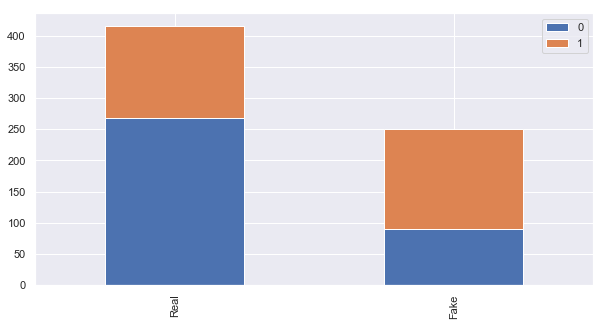

In [6]:
bar_chart('gender')

In [7]:
train_test_data = [train,test]

fam_maping = {"no":0,"yes":1}
for dataset in train_test_data:
    dataset['family']= dataset['family'].map(fam_maping)

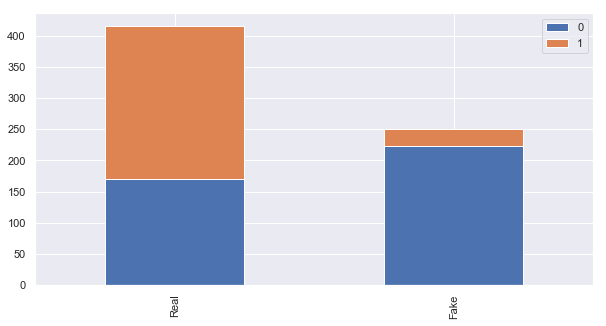

In [8]:
bar_chart('family')

In [9]:
train_test_data = [train,test]

Edu_maping = {"no":0,"high school":1,"secondary school":2,"university":3}
for dataset in train_test_data:
    dataset['education']= dataset['education'].map(Edu_maping)

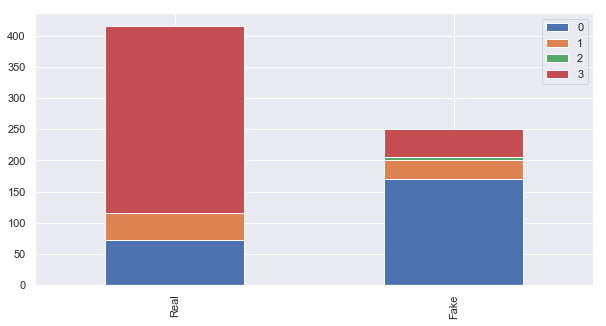

In [10]:
bar_chart('education')

In [11]:
train_test_data = [train,test]

relationship_maping = {"alone":0,"married":1,"complicate":2}
for dataset in train_test_data:
    dataset['relationship']= dataset['relationship'].map(relationship_maping)

In [12]:
train['relationship'].fillna(train.groupby('family')['relationship'].transform('median'),inplace=True)
test['relationship'].fillna(test.groupby('family')['relationship'].transform('median'),inplace=True)

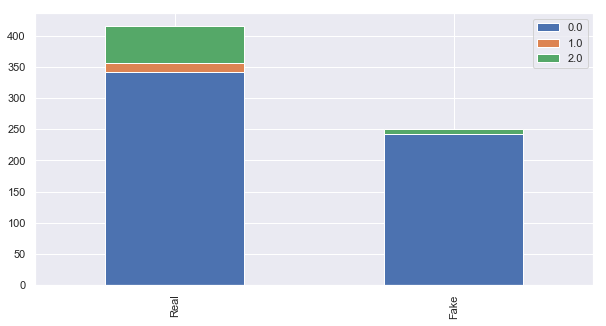

In [13]:
bar_chart('relationship')

In [14]:
train.head()

,ID,Status,No Friend,education,about me,family,gender,relationship,phototag*,photopost*,...,music,film,series,book,game,restaurant,like,group,note,post shared/post posted rate
0,101,real,170,3,yes,1,0,2.0,29,59,...,1,3,6,0,6,2,101,2,yes,0.1
1,102,real,353,3,yes,1,0,0.0,1,13,...,11,6,10,1,1,6,550,19,no,0.1
2,103,real,517,3,no,1,0,0.0,112,236,...,0,8,3,1,5,17,318,23,yes,0.5
3,104,real,460,3,no,1,0,0.0,74,142,...,16,14,17,6,19,0,900,32,yes,0.3
4,105,real,240,3,no,1,1,2.0,23,13,...,0,0,0,0,0,0,15,2,no,0.1


In [15]:
train_test_data = [train,test]

note_maping = {"yes":1,"no":0}
for dataset in train_test_data:
    dataset['note']= dataset['note'].map(note_maping)

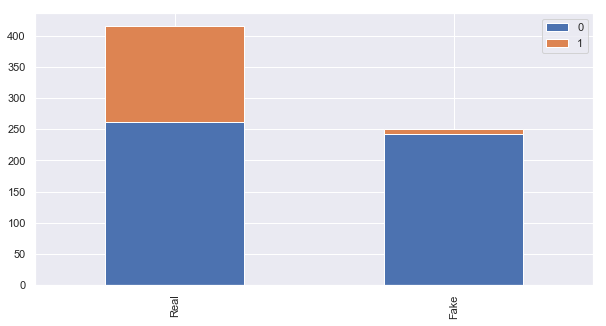

In [16]:
bar_chart('note')

In [17]:
train_test_data = [train,test]

aboutme_maping = {"yes":1,"no":0}
for dataset in train_test_data:
    dataset['about me']= dataset['about me'].map(aboutme_maping)

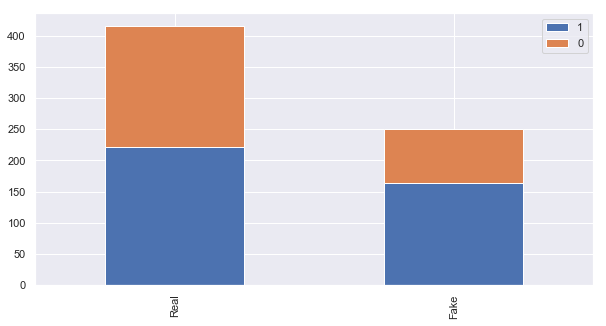

In [18]:
bar_chart('about me')

# 변수제거

In [19]:
train.drop('music',axis=1, inplace=True)
test.drop('music',axis=1,inplace=True)
train.drop('game',axis=1, inplace=True)
test.drop('game',axis=1,inplace=True)
train.drop('film',axis=1, inplace=True)
test.drop('film',axis=1,inplace=True)
train.drop('book',axis=1, inplace=True)
test.drop('book',axis=1,inplace=True)
train.drop('series',axis=1, inplace=True)
test.drop('series',axis=1,inplace=True)
train.drop('restaurant',axis=1, inplace=True)
test.drop('restaurant',axis=1,inplace=True)
train.drop('player',axis=1, inplace=True)
test.drop('player',axis=1,inplace=True)
train.drop('sport',axis=1, inplace=True)
test.drop('sport',axis=1,inplace=True)
train.drop('group',axis=1, inplace=True)
test.drop('group',axis=1,inplace=True)
train.drop('video',axis=1, inplace=True)
test.drop('video',axis=1,inplace=True)
train.drop('post shared/post posted rate',axis=1, inplace=True)
test.drop('post shared/post posted rate',axis=1,inplace=True)

# 범주형 데이터 변환

In [20]:
for dataset in train_test_data:
    dataset.loc[ dataset['phototag*']<=20,'phototag*'] = 0,
    dataset.loc[(dataset['phototag*']>20) & (dataset['phototag*']<=40),'phototag*'] = 1,
    dataset.loc[(dataset['phototag*']>40) & (dataset['phototag*']<=60),'phototag*'] = 2,
    dataset.loc[(dataset['phototag*']>60) & (dataset['phototag*']<=80),'phototag*'] = 3,
    dataset.loc[(dataset['phototag*']>80) & (dataset['phototag*']<=100),'phototag*'] = 4,
    dataset.loc[(dataset['phototag*']>100) & (dataset['phototag*']<=150),'phototag*'] = 5,
    dataset.loc[(dataset['phototag*']>150) & (dataset['phototag*']<=200),'phototag*'] = 6,
    dataset.loc[(dataset['phototag*']>200) & (dataset['phototag*']<=250),'phototag*'] = 7,
    dataset.loc[(dataset['phototag*']>250) & (dataset['phototag*']<=300),'phototag*'] = 8,
    dataset.loc[(dataset['phototag*']>300) & (dataset['phototag*']<=350),'phototag*'] = 9,
    dataset.loc[(dataset['phototag*']>350) & (dataset['phototag*']<=400),'phototag*'] = 10,
    dataset.loc[(dataset['phototag*']>400),'phototag*'] = 11

In [21]:
for dataset in train_test_data:
    dataset.loc[ dataset['photopost*']<=20,'photopost*'] = 0,
    dataset.loc[(dataset['photopost*']>20) & (dataset['photopost*']<=40),'photopost*'] = 1,
    dataset.loc[(dataset['photopost*']>40) & (dataset['photopost*']<=60),'photopost*'] = 2,
    dataset.loc[(dataset['photopost*']>60) & (dataset['photopost*']<=80),'photopost*'] = 3,
    dataset.loc[(dataset['photopost*']>80) & (dataset['photopost*']<=100),'photopost*'] = 4,
    dataset.loc[(dataset['photopost*']>100) & (dataset['photopost*']<=150),'photopost*'] = 5,
    dataset.loc[(dataset['photopost*']>150) & (dataset['photopost*']<=200),'photopost*'] = 6,
    dataset.loc[(dataset['photopost*']>200) & (dataset['photopost*']<=250),'photopost*'] = 7,
    dataset.loc[(dataset['photopost*']>250) & (dataset['photopost*']<=300),'photopost*'] = 8,
    dataset.loc[(dataset['photopost*']>300) & (dataset['photopost*']<=350),'photopost*'] = 9,
    dataset.loc[(dataset['photopost*']>350) & (dataset['photopost*']<=400),'photopost*'] = 10,
    dataset.loc[(dataset['photopost*']>400),'photopost*'] = 11

In [22]:
for dataset in train_test_data:
    dataset.loc[ dataset['checkin']<=20,'checkin'] = 0,
    dataset.loc[(dataset['checkin']>20) & (dataset['checkin']<=40),'checkin'] = 1,
    dataset.loc[(dataset['checkin']>40) & (dataset['checkin']<=60),'checkin'] = 2,
    dataset.loc[(dataset['checkin']>60) & (dataset['checkin']<=80),'checkin'] = 3,
    dataset.loc[(dataset['checkin']>80) & (dataset['checkin']<=100),'checkin'] = 4,
    dataset.loc[(dataset['checkin']>100) & (dataset['checkin']<=150),'checkin'] = 5

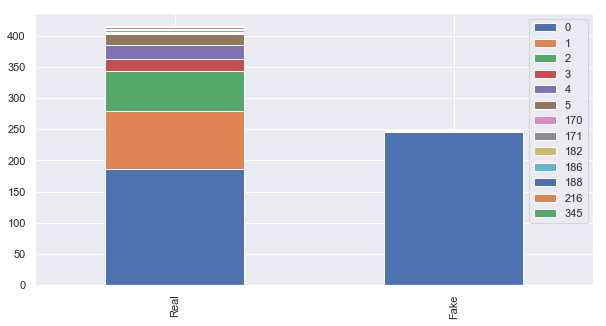

In [23]:
bar_chart('checkin')

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


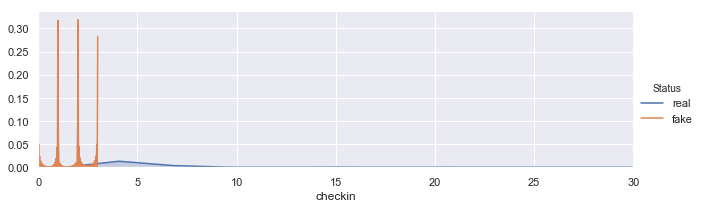

In [24]:
facet = sns.FacetGrid(train, hue='Status',aspect=3)
facet.map(sns.kdeplot,'checkin',shade=True)
facet.set(xlim=(train['checkin'].min(),train['checkin'].max()))
facet.add_legend()
plt.xlim(0,30)
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


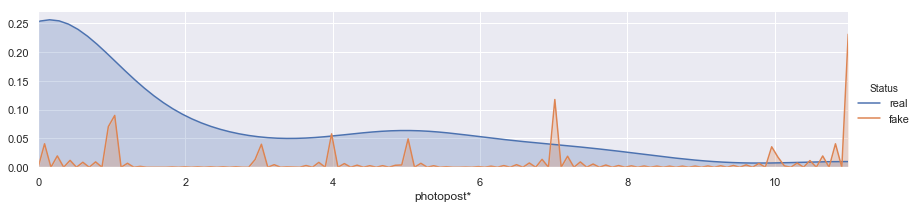

In [25]:
facet = sns.FacetGrid(train, hue='Status',aspect=4)
facet.map(sns.kdeplot,'photopost*',shade=True)
facet.set(xlim=(train['photopost*'].min(),train['photopost*'].max()))
facet.add_legend()

plt.show()

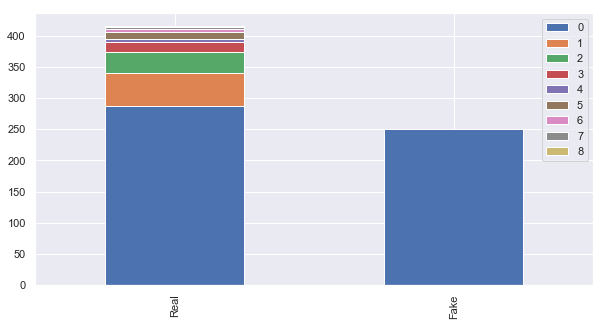

In [26]:
bar_chart('phototag*')

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


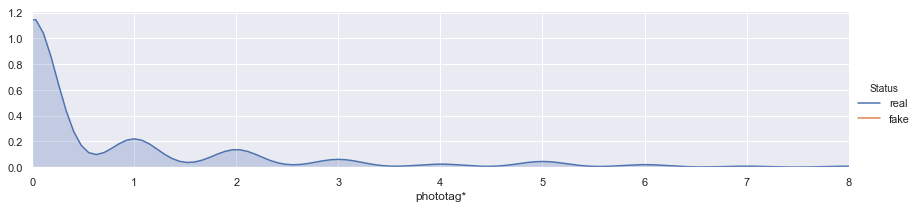

In [27]:
facet = sns.FacetGrid(train, hue='Status',aspect=4)
facet.map(sns.kdeplot,'phototag*',shade=True)
facet.set(xlim=(train['phototag*'].min(),train['phototag*'].max()))
facet.add_legend()

plt.show()

In [28]:
for dataset in train_test_data:
    dataset.loc[ dataset['like']<=20,'like'] = 0,
    dataset.loc[(dataset['like']>20) & (dataset['like']<=40),'like'] = 1,
    dataset.loc[(dataset['like']>40) & (dataset['like']<=60),'like'] = 2,
    dataset.loc[(dataset['like']>60) & (dataset['like']<=80),'like'] = 3,
    dataset.loc[(dataset['like']>80) & (dataset['like']<=100),'like'] = 4
    dataset.loc[(dataset['like']>100) & (dataset['like']<=150),'like'] = 5,
    dataset.loc[(dataset['like']>150) & (dataset['like']<=200),'like'] = 6,
    dataset.loc[(dataset['like']>200) & (dataset['like']<=250),'like'] = 7,
    dataset.loc[(dataset['like']>250) & (dataset['like']<=300),'like'] = 8,
    dataset.loc[(dataset['like']>300) & (dataset['like']<=350),'like'] = 9,
    dataset.loc[(dataset['like']>350) & (dataset['like']<=400),'like'] = 10,
    dataset.loc[(dataset['like']>400) & (dataset['like']<=450),'like'] = 11,
    dataset.loc[(dataset['like']>450) & (dataset['like']<=500),'like'] = 12,
    dataset.loc[(dataset['like']>500) & (dataset['like']<=550),'like'] = 13,
    dataset.loc[(dataset['like']>550) & (dataset['like']<=600),'like'] = 14,
    dataset.loc[(dataset['like']>600) & (dataset['like']<=650),'like'] = 15,
    dataset.loc[(dataset['like']>650) & (dataset['like']<=700),'like'] = 16,
    dataset.loc[(dataset['like']>700) & (dataset['like']<=750),'like'] = 17,
    dataset.loc[(dataset['like']>750) & (dataset['like']<=800),'like'] = 18,
    dataset.loc[(dataset['like']>800) & (dataset['like']<=850),'like'] = 19,
    dataset.loc[(dataset['like']>850) & (dataset['like']<=900),'like'] = 20,
    dataset.loc[(dataset['like']>900) & (dataset['like']<=950),'like'] = 21,
    dataset.loc[(dataset['like']>950) & (dataset['like']<=1000),'like'] = 22,
    dataset.loc[(dataset['like']>1000) & (dataset['like']<=2000),'like'] = 23,
    dataset.loc[(dataset['like']>2000),'like'] = 24

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


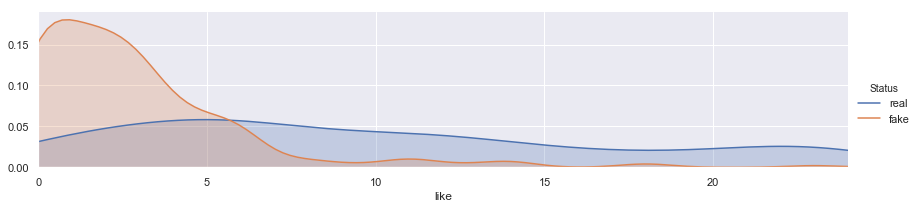

In [29]:
facet = sns.FacetGrid(train, hue='Status',aspect=4)
facet.map(sns.kdeplot,'like',shade=True)
facet.set(xlim=(train['like'].min(),train['like'].max()))
facet.add_legend()

plt.show()

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


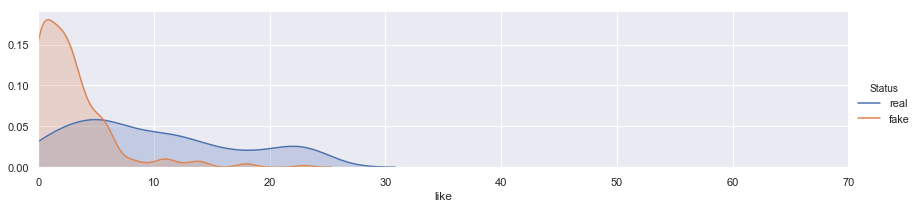

In [30]:
facet = sns.FacetGrid(train, hue='Status',aspect=4)
facet.map(sns.kdeplot,'like',shade=True)
facet.add_legend()
plt.xlim(0,70)
plt.show()

In [31]:
for dataset in train_test_data:
    dataset.loc[ dataset['No Friend']<=20,'No Friend'] = 0,
    dataset.loc[(dataset['No Friend']>20) & (dataset['No Friend']<=100),'No Friend'] = 1,
    dataset.loc[(dataset['No Friend']>100) & (dataset['No Friend']<=200),'No Friend'] = 2,
    dataset.loc[(dataset['No Friend']>200) & (dataset['No Friend']<=300),'No Friend'] = 3,
    dataset.loc[(dataset['No Friend']>300) & (dataset['No Friend']<=400),'No Friend'] = 4,
    dataset.loc[(dataset['No Friend']>400) & (dataset['No Friend']<=500),'No Friend'] = 5,
    dataset.loc[(dataset['No Friend']>500) & (dataset['No Friend']<=600),'No Friend'] = 6,
    dataset.loc[(dataset['No Friend']>600) & (dataset['No Friend']<=700),'No Friend'] = 7,
    dataset.loc[(dataset['No Friend']>700) & (dataset['No Friend']<=800),'No Friend'] = 8,
    dataset.loc[(dataset['No Friend']>800) & (dataset['No Friend']<=900),'No Friend'] = 9,
    dataset.loc[(dataset['No Friend']>900) & (dataset['No Friend']<=1000),'No Friend'] = 10,
    dataset.loc[(dataset['No Friend']>1000),'No Friend'] = 11

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


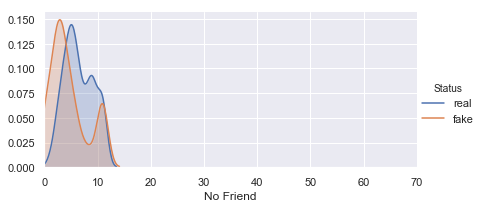

In [32]:
facet = sns.FacetGrid(train, hue='Status',aspect=2)
facet.map(sns.kdeplot,'No Friend',shade=True)
facet.add_legend()
plt.xlim(0,70)
plt.show()

In [33]:
train.head(10)

,ID,Status,No Friend,education,about me,family,gender,relationship,phototag*,photopost*,checkin,like,note
0,101,real,2,3,1,1,0,2.0,1,2,0,5,1
1,102,real,4,3,1,1,0,0.0,0,0,0,13,0
2,103,real,6,3,0,1,0,0.0,5,7,4,9,1
3,104,real,5,3,0,1,0,0.0,3,5,4,20,1
4,105,real,3,3,0,1,1,2.0,1,0,0,0,0
5,106,real,4,1,0,1,0,2.0,0,5,1,2,0
6,107,real,5,0,0,1,0,1.0,0,0,0,2,0
7,108,real,6,3,0,1,0,0.0,0,1,1,5,0
8,109,real,10,3,0,1,0,0.0,1,0,2,5,1
9,110,real,5,3,0,1,0,0.0,0,1,1,12,1


## TRAINING

In [34]:
train=train.drop(['ID'],axis=1)

In [35]:
train_data= train.drop('Status',axis=1)
target=train['Status']

train_data.shape,target.shape

((666, 11), (666,))

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True,random_state=0)

## kNN

In [38]:
clf= KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.8358209  0.91044776 0.8358209  0.79104478 0.86567164 0.8358209
 0.81818182 0.78787879 0.89393939 0.86363636]


In [39]:
round(np.mean(score)*100,2)

84.38

## Decision Tree

In [40]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.94029851 0.92537313 0.94029851 0.91044776 0.97014925 0.95522388
 0.92424242 0.90909091 0.92424242 0.93939394]


In [41]:
round(np.mean(score)*100,2)

93.39

## Random Forest

In [42]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.94029851 0.92537313 0.98507463 0.91044776 0.97014925 0.95522388
 0.90909091 0.90909091 0.93939394 0.98484848]


In [43]:
round(np.mean(score)*100,2)

94.29

## Naive Bayes

In [44]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.76119403 0.7761194  0.82089552 0.76119403 0.80597015 0.8358209
 0.78787879 0.72727273 0.89393939 0.78787879]


In [45]:
round(np.mean(score)*100,2)

79.58

## SVM

In [46]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.91044776 0.95522388 0.91044776 0.8358209  0.94029851 0.94029851
 0.90909091 0.84848485 0.89393939 0.93939394]


In [47]:
round(np.mean(score)*100,2)

90.83

# Testing SVM  #83%

In [48]:
clf=SVC()
clf.fit(train_data, target)

test_data= test.drop('ID',axis=1).copy()
prediction= clf.predict(test_data)

In [49]:
submission= pd.DataFrame({
    'ID': test['ID'],
    'Status':prediction
})

submission.to_csv('Status_SVM.csv',index=False)

In [50]:
submission = pd.read_csv('Status_SVM.csv')
submission.head(10)

,ID,Status
0,1000,real
1,1001,real
2,1002,real
3,1003,fake
4,1004,fake
5,1005,fake
6,1006,fake
7,1007,real
8,1008,real
9,1009,real


In [51]:
train_data.shape,target.shape

((666, 11), (666,))

In [52]:
test_data.shape,target.shape

((223, 11), (666,))

## TESTING RANDOM FOREST   #93%

In [53]:
clf=RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)

test_data= test.drop('ID',axis=1).copy()
prediction= clf.predict(test_data)

In [54]:
submission= pd.DataFrame({
    'ID': test['ID'],
    'Status':prediction
})

submission.to_csv('Status_RandomForest.csv',index=False)

In [55]:
submission = pd.read_csv('Status_RandomForest.csv')
submission.head(10)

,ID,Status
0,1000,real
1,1001,real
2,1002,real
3,1003,real
4,1004,fake
5,1005,real
6,1006,fake
7,1007,real
8,1008,real
9,1009,real


## TESTING Decision Tree  #97.7%

In [56]:
clf=DecisionTreeClassifier()
clf.fit(train_data, target)

test_data= test.drop('ID',axis=1).copy()
prediction= clf.predict(test_data)

In [57]:
submission= pd.DataFrame({
    'ID': test['ID'],
    'Status':prediction
})

submission.to_csv('Status_DecisionTree.csv',index=False)

In [58]:
submission = pd.read_csv('Status_DecisionTree.csv')
submission.head(10)

,ID,Status
0,1000,real
1,1001,real
2,1002,real
3,1003,real
4,1004,fake
5,1005,real
6,1006,real
7,1007,real
8,1008,real
9,1009,real


## TESTING KNN #80.7%

In [59]:
clf=KNeighborsClassifier(n_neighbors=13)
clf.fit(train_data, target)

test_data= test.drop('ID',axis=1).copy()
prediction= clf.predict(test_data)

In [60]:
submission= pd.DataFrame({
    'ID': test['ID'],
    'Status':prediction
})

submission.to_csv('Status_kNN.csv',index=False)

In [61]:
submission = pd.read_csv('Status_kNN.csv')
submission.head(10)

,ID,Status
0,1000,real
1,1001,fake
2,1002,fake
3,1003,fake
4,1004,fake
5,1005,fake
6,1006,fake
7,1007,real
8,1008,fake
9,1009,real


## TESTING Naive Bayes  #83.4%

In [62]:
clf=GaussianNB()
clf.fit(train_data, target)

test_data= test.drop('ID',axis=1).copy()
prediction= clf.predict(test_data)

In [63]:
submission= pd.DataFrame({
    'ID': test['ID'],
    'Status':prediction
})

submission.to_csv('Status_NaiveBayes.csv',index=False)

In [64]:
submission = pd.read_csv('Status_NaiveBayes.csv')
submission.head(10)

,ID,Status
0,1000,fake
1,1001,fake
2,1002,fake
3,1003,fake
4,1004,fake
5,1005,fake
6,1006,fake
7,1007,fake
8,1008,fake
9,1009,real
